Dataset Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


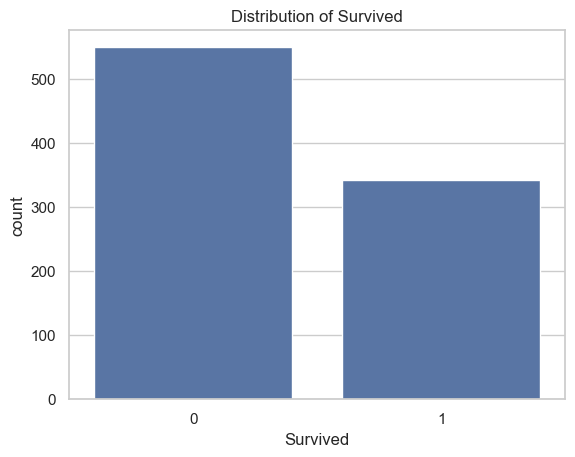

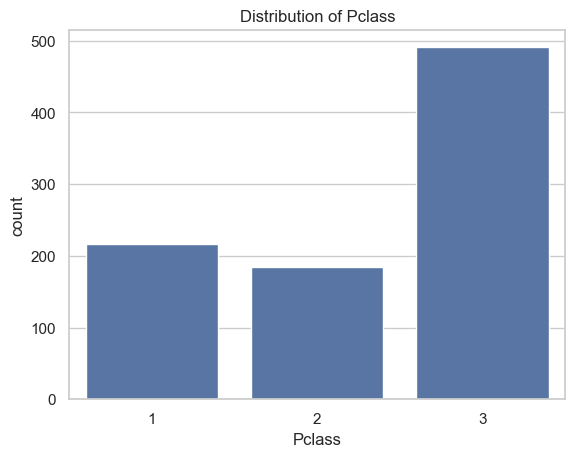

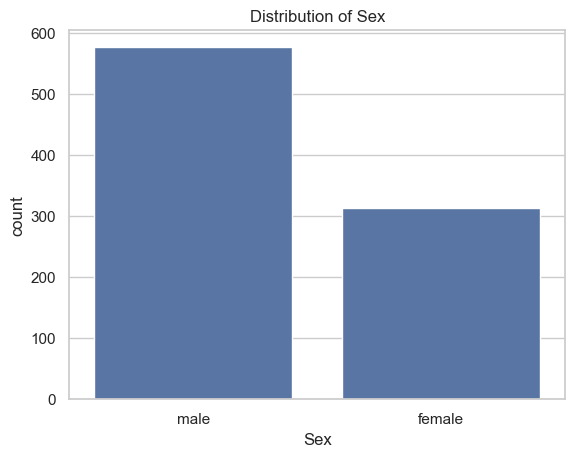

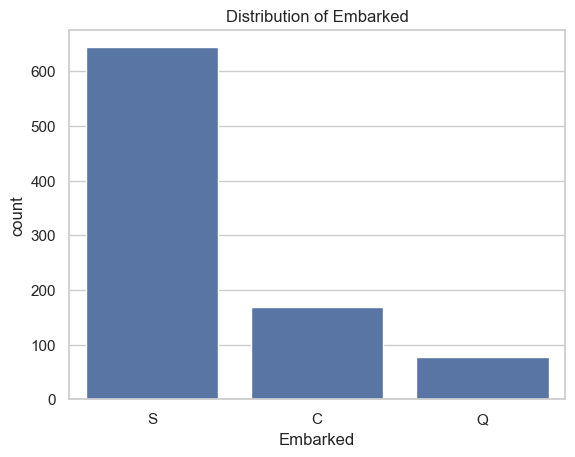

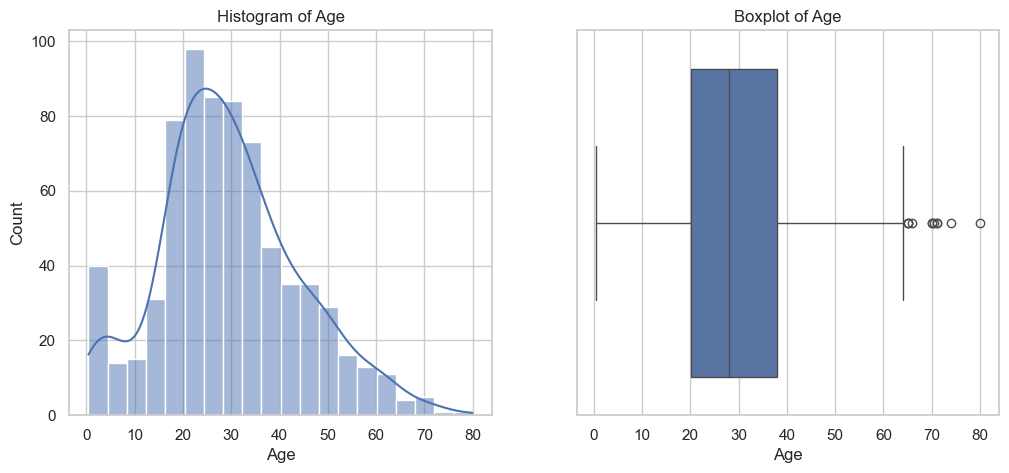

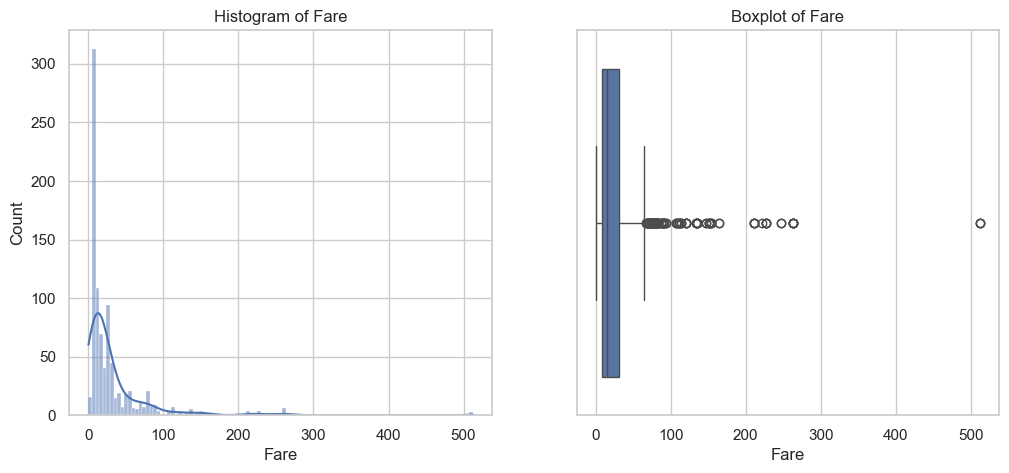

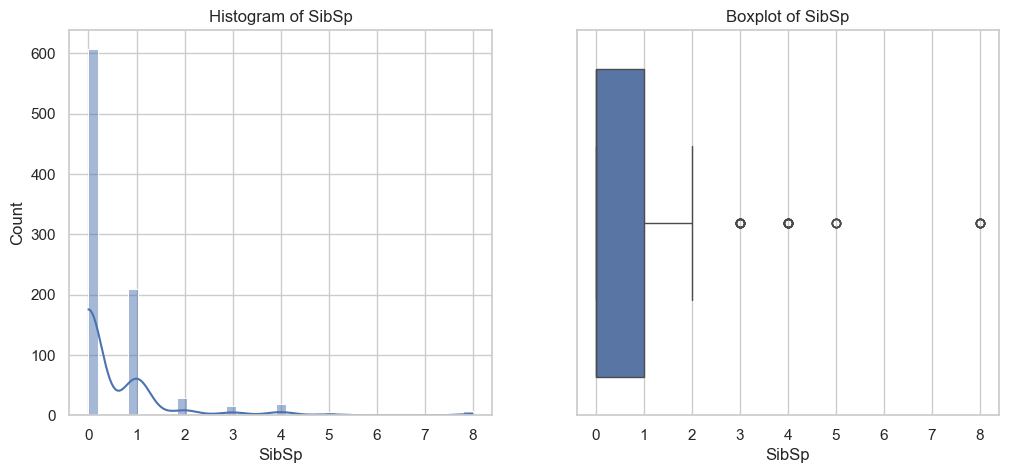

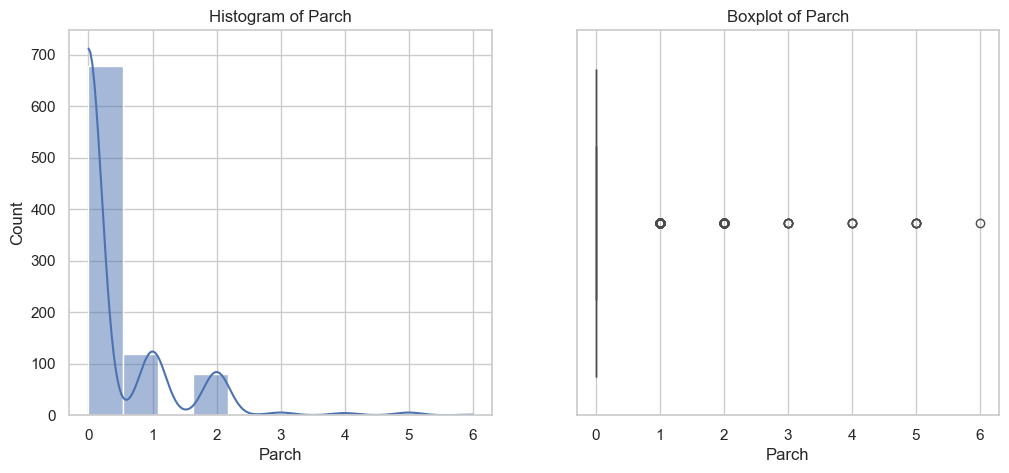

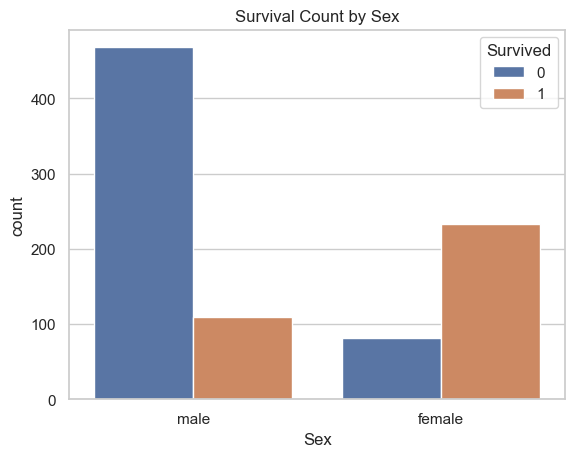

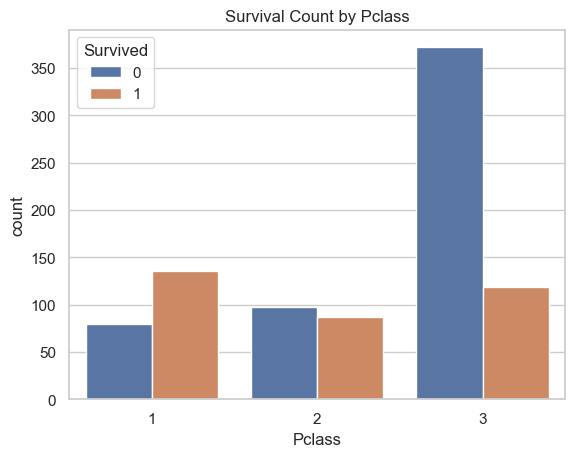

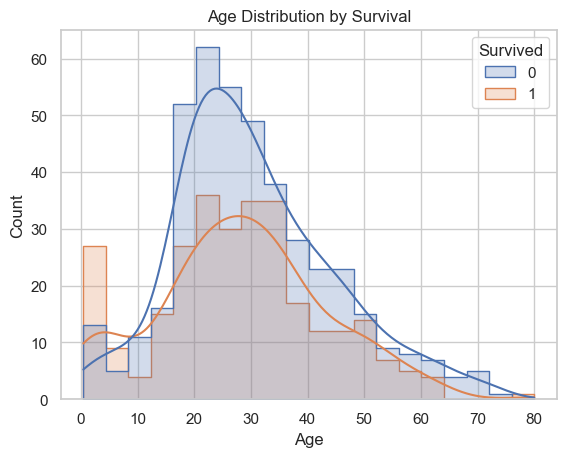

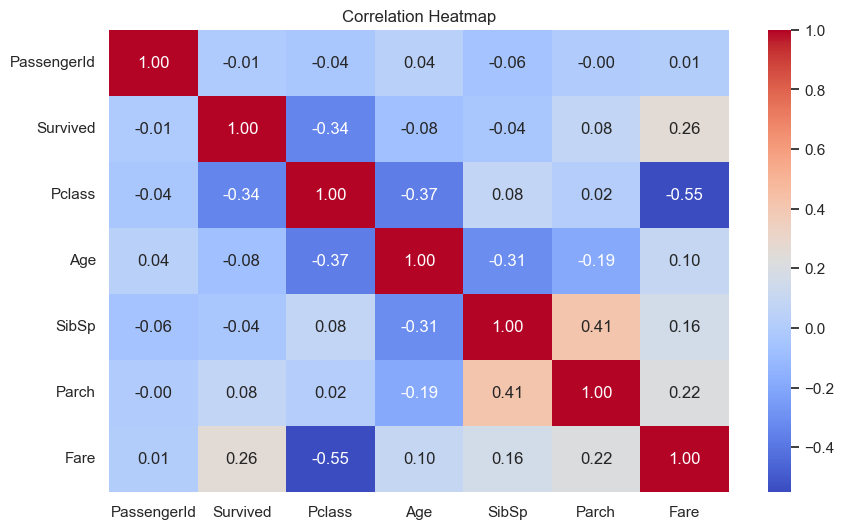

Skewness of numerical features:
Age: 0.39
Fare: 4.78


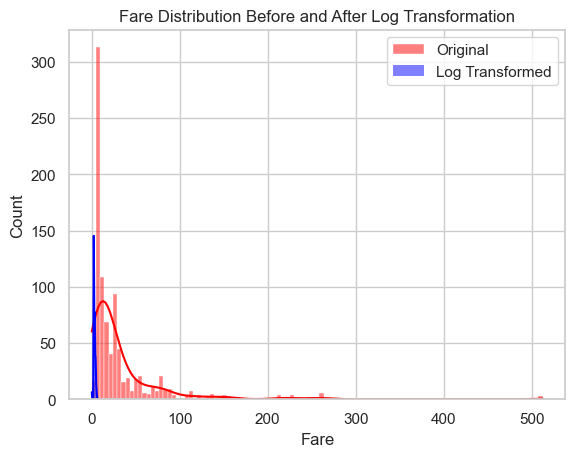


- Most passengers did not survive (~62%).
- Females had a much higher survival rate than males.
- Passengers in 1st class had a better chance of survival.
- Age and Fare show right skew; Fare was log transformed.
- Missing values found in Age, Cabin, and Embarked.
- Correlation highest between Pclass & Fare, SibSp & Parch.



In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style="whitegrid")
%matplotlib inline

# 2. Load Dataset
df = pd.read_csv("train.csv")

# 3. Data Overview
print("Dataset Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe())
print("Missing Values:\n", df.isnull().sum())

# 4. Univariate Analysis

# Plotting categorical features
categorical = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in categorical:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plotting numerical features
numerical = ['Age', 'Fare', 'SibSp', 'Parch']
for col in numerical:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()

# 5. Bivariate Analysis

# Survival vs Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Sex")
plt.show()

# Survival vs Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Pclass")
plt.show()

# Age vs Survival
sns.histplot(data=df, x='Age', hue='Survived', kde=True, element="step")
plt.title("Age Distribution by Survival")
plt.show()

# 6. Correlation and Heatmap
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (optional, heavy)
# sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')

# 7. Handling Skewness
from scipy.stats import skew

print("Skewness of numerical features:")
for col in ['Age', 'Fare']:
    val = skew(df[col].dropna())
    print(f"{col}: {val:.2f}")

# Apply log1p to fix skewness in 'Fare'
df['Fare_log'] = np.log1p(df['Fare'])

# Before and after log transformation
sns.histplot(df['Fare'], kde=True, color='red', label='Original')
sns.histplot(df['Fare_log'], kde=True, color='blue', label='Log Transformed')
plt.title("Fare Distribution Before and After Log Transformation")
plt.legend()
plt.show()

# 8. Summary of Findings
summary = """
- Most passengers did not survive (~62%).
- Females had a much higher survival rate than males.
- Passengers in 1st class had a better chance of survival.
- Age and Fare show right skew; Fare was log transformed.
- Missing values found in Age, Cabin, and Embarked.
- Correlation highest between Pclass & Fare, SibSp & Parch.
"""
print(summary)
